In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

In [13]:
# Read the data from the text file
with open('/Users/sarthakchawla/Downloads/newthyroid-2.txt') as file:
    raw_data = file.readlines()

In [14]:
# Create a new list to store the formatted data
formatted_data = []

# Loop through the data and split it into columns
for line in raw_data:
    columns = line.split(',')
    formatted_data.append([columns[0], columns[1], columns[2], columns[3], columns[4], columns[5].strip()])

# Write the formatted data to a CSV file
with open('thyroid.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['class', 'F1', 'F2', 'F3', 'F4', 'F5'])
    writer.writerows(formatted_data)


In [15]:
# Load the new csv file
df= pd.read_csv('thyroid.csv')

In [16]:
# Remove the irrelevant rows
df = df.drop([0,1,2,3,4,5])

In [17]:
# Write the modified DataFrame back to a CSV file
df.to_csv('modified_csv_file.csv', index=False)

In [18]:
# Read the final modified csv
data= pd.read_csv('modified_csv_file.csv')

In [19]:
data

,class,F1,F2,F3,F4,F5
0,n,105,6.1,2.1,1.4,7.0
1,n,110,10.4,1.6,1.6,2.7
2,n,114,9.9,2.4,1.5,5.7
3,n,106,9.4,2.2,1.5,0.0
4,n,107,13.0,1.1,0.9,3.1
...,...,...,...,...,...,...
175,h,88,16.5,4.9,0.8,0.1
176,h,97,15.1,1.8,1.2,-0.2
177,h,106,13.4,3.0,1.1,0.0
178,h,79,19.0,5.5,0.9,0.3


In [20]:
# Separate the features and target variable
X = data.drop('class', axis=1)
Y = data['class']

knn_auc_scores = []
lda_auc_scores = []

# Repeat the random split 10 times
for p in range(10):
    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=p)
    
    # Define the range of k values 
    k_range = range(3, 16, 2)
    
    # Generate lists to store the cross-validation and AUC scores
    cv_scores = []
    auc_scores = []
    
    # Loop over the k values and compute the cross-validation and AUC scores
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict_proba(X_test)[:, 1]
        auc_scores.append(roc_auc_score(Y_test, Y_pred))
    
    # Choose the k with the highest AUC score
    best_k = k_range[auc_scores.index(max(auc_scores))]
    print('Best k for fold {} is {}'.format(p+1, best_k))
    
    # Train kNN with the best k value and compute the AUC score on the test set
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_pred)
    knn_auc_scores.append(auc_score)
    print('Test AUC for kNN in fold {} is {:.3f}'.format(p+1, auc_score))
    
    # Apply LDA and compute the AUC score on the test set
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, Y_train)
    Y_pred = lda.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_pred)
    lda_auc_scores.append(auc_score)
    print('Test AUC for LDA in fold {} is {:.3f}'.format(p+1, auc_score))
    


Best k for fold 1 is 3
Test AUC for kNN in fold 1 is 1.000
Test AUC for LDA in fold 1 is 1.000
Best k for fold 2 is 3
Test AUC for kNN in fold 2 is 1.000
Test AUC for LDA in fold 2 is 1.000
Best k for fold 3 is 3
Test AUC for kNN in fold 3 is 0.991
Test AUC for LDA in fold 3 is 1.000
Best k for fold 4 is 7
Test AUC for kNN in fold 4 is 0.938
Test AUC for LDA in fold 4 is 0.998
Best k for fold 5 is 5
Test AUC for kNN in fold 5 is 0.998
Test AUC for LDA in fold 5 is 1.000
Best k for fold 6 is 3
Test AUC for kNN in fold 6 is 0.994
Test AUC for LDA in fold 6 is 0.988
Best k for fold 7 is 3
Test AUC for kNN in fold 7 is 1.000
Test AUC for LDA in fold 7 is 1.000
Best k for fold 8 is 5
Test AUC for kNN in fold 8 is 1.000
Test AUC for LDA in fold 8 is 0.990
Best k for fold 9 is 3
Test AUC for kNN in fold 9 is 1.000
Test AUC for LDA in fold 9 is 1.000
Best k for fold 10 is 3
Test AUC for kNN in fold 10 is 0.982
Test AUC for LDA in fold 10 is 1.000


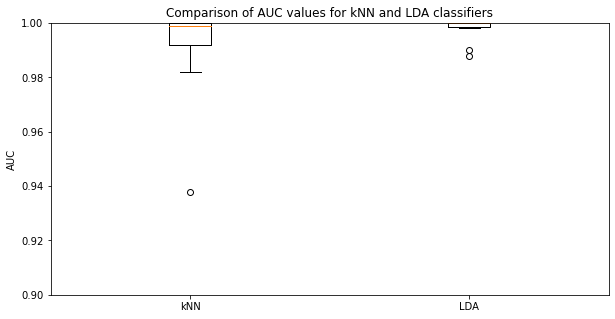

In [22]:
# State the AUC values for kNN and LDA classifiers
knn_auc = [1.000, 1.000, 0.991, 0.938, 0.998, 0.994, 1.000, 1.000, 1.000, 0.982]
lda_auc = [1.000, 1.000, 1.000, 0.998, 1.000, 0.988, 1.000, 0.990, 1.000, 1.000]

# Combine AUC values for both classifiers
auc_data = [knn_auc, lda_auc]

# Create a boxplot
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(auc_data)

# Set x-axis tick labels and title
ax.set_xticklabels(['kNN', 'LDA'])
ax.set_title('Comparison of AUC values for kNN and LDA classifiers')

# Set y-axis limits and labels
ax.set_ylim([0.90, 1.0])
ax.set_ylabel('AUC')

# Show plot
plt.show()


#Looking at the two boxplots, we can see that both kNN and LDA classifiers have high AUC values, indicating good performance in classification tasks. The median AUC value for kNN is slightly lower than that of LDA, but the difference is not significant. The interquartile range (IQR) for kNN is smaller than that of LDA, indicating less variability in the AUC values across the folds. However, there are a few outliers in the kNN boxplot, indicating that the performance of the kNN classifier varies across the different folds.

Overall, both classifiers have similar performance, but LDA seems to have slightly more consistent performance across the different folds.